# Exponential Population Scatterplot

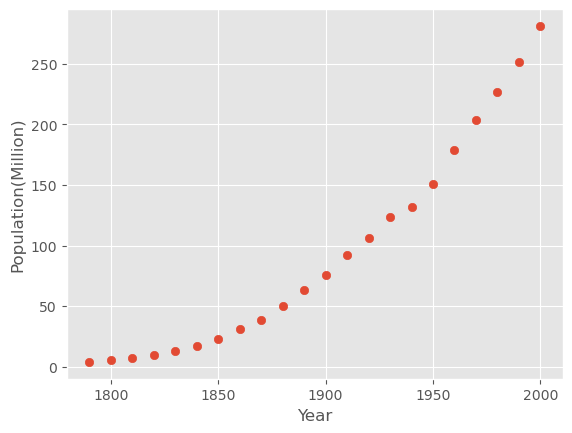

In [4]:
import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6, 50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204, 226.5,251.4,281.4]
plt.scatter(year, population)
plt.xlabel("Year")
plt.ylabel("Population(Million)")
plt.show()

# Exponential Population Model

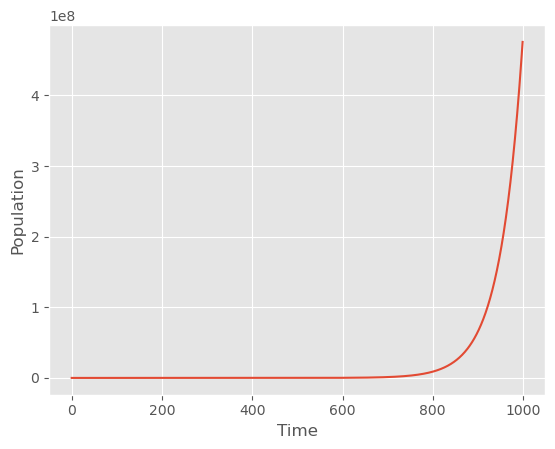

In [7]:
import numpy as np
x0 = 1 # 初始人口数
r = 0.02 # 增长率
t = [i for i in range(1000)] # 时间列表
x_t = [x0 * np.exp(r * time) for time in t] # 人口增长记录
plt.plot(t, x_t) # 绘图 
plt.xlabel("Time") # 加横坐标label 
plt.ylabel("Population") # 加纵坐标label 
plt.show()

# Fit Linear Model Against ln(Population)

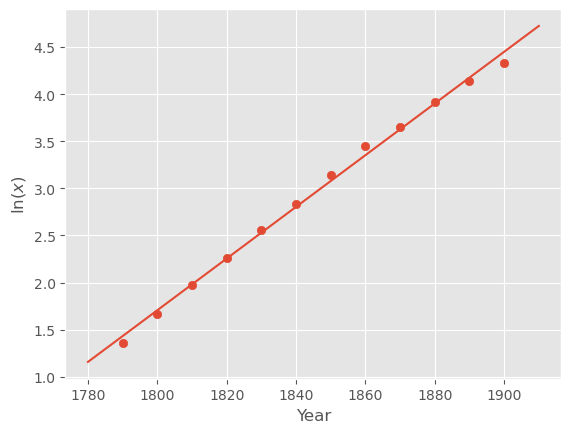

In [12]:
from sklearn.linear_model import LinearRegression 
ln_population = np.log(population) # 对人口取对数，得到y 
plt.scatter(year[0:12],ln_population[0:12])
# Linear Regression
lrModel = LinearRegression() 
lrModel.fit(np.array(year[0:12]).reshape(-1,1), ln_population[0:12])
ln_population_fit = [lrModel.intercept_ + lrModel.coef_ *i for i in range(1780,1920,10)] 
plt.plot(range(1780,1920,10),ln_population_fit) # 将线性回归以后的直线绘制在散点图上 
plt.xlabel("Year") # 加横坐标labal 
plt.ylabel(r'$\ln(x)$') # 加纵坐标label 
plt.show()

# Discrepancy Between Model and Data
We observe that after extropolating our model, the predicted population is significantly larger than the actual population.

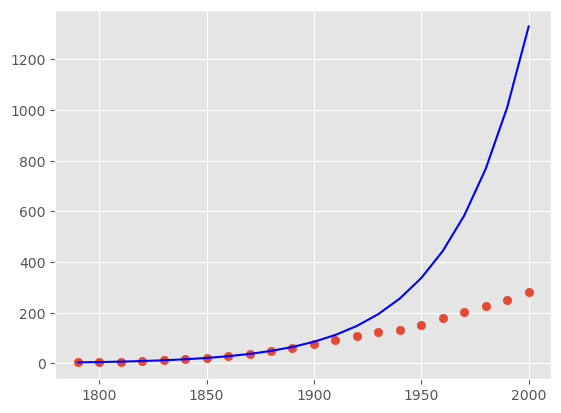

In [15]:
year = [i for i in range(1790,2010,10)]
population =[3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4] 
plt.scatter(year,population,label = 'Real Data') 
from sklearn.linear_model import LinearRegression 
ln_population = np.log(population) # 对人口取对数 
lrModel = LinearRegression() 
lrModel.fit(np.array(year[0:12]).reshape(-1,1), 
ln_population[0:12])
ln_population_fit = [lrModel.intercept_ + lrModel.coef_ *i for i in range(1780,1920,10)]
r = lrModel.coef_ # 预测直线增长率
x0 = np.exp(lrModel.intercept_) 
pop_predicted = [x0 * np.exp(lrModel.coef_ * time) for time in year]
plt.plot(year,pop_predicted,'b',label = 'Predicted')
plt.show()
  

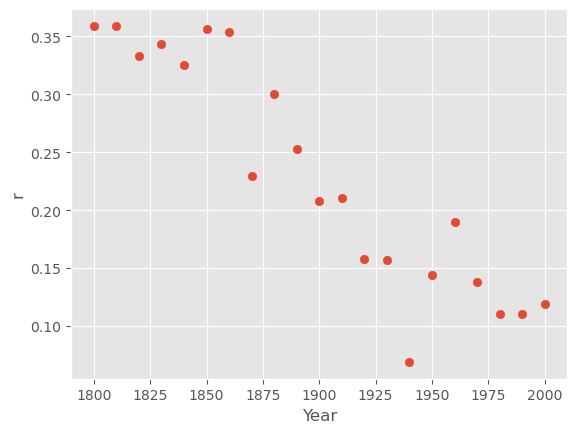

In [17]:
year = [i for i in range(1790,2010,10)] #时间列表 
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6, 50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204, 226.5,251.4,281.4]
rate = []
for i in range(len(population)-1):
    rate.append((population[i+1] - population[i])/population[i])
plt.scatter(year[1:],rate)
plt.xlabel("Year")
plt.ylabel("r")
plt.show()

# Logistic Model

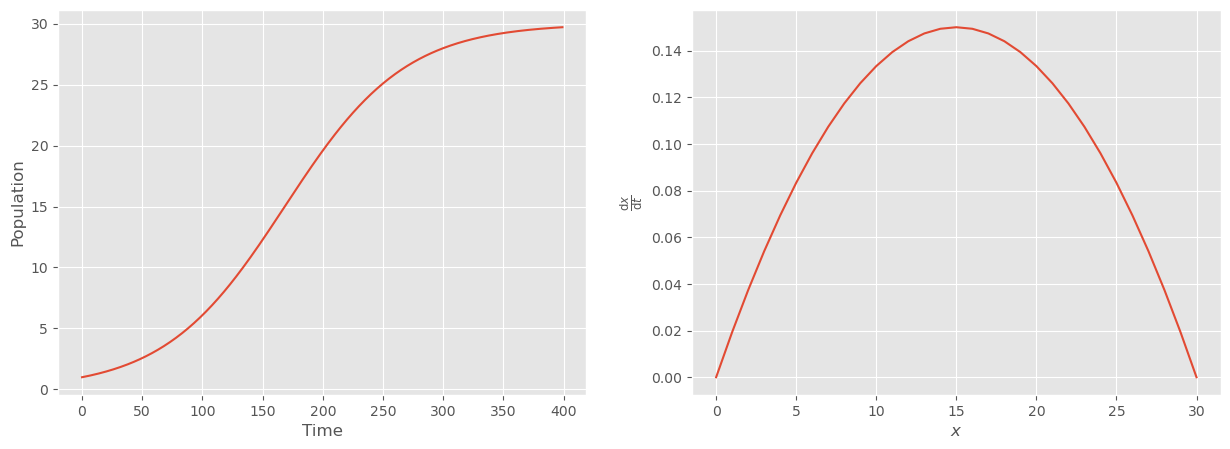

In [18]:
x0 = 1
xm = 30
r = 0.02
# 获得x 和f(x)
t = [i for i in range(400)] # 取合适的值t
x_t = [xm * (1 + (xm/x0 -1)*np.exp(- r * time))**(-1) for time in t]
# 绘图增长曲线1: 
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
plt.plot(t,x_t) # 绘图 
plt.xlabel("Time") # 加横坐标label 
plt.ylabel("Population") # 加纵坐标label
plt.subplot(1,2,2) 
x = [xm*i/30 for i in range(31)]
deri_x = [r * xx * (1-xx/xm) for xx in x]
plt.plot(x,deri_x)
plt.xlabel(r'$x$') 
plt.ylabel(r'$\frac{\mathrm{d}x}{\mathrm{d}t}$') # 加纵坐标label
plt.show()

The logistic model is derived from the fact that the growth rate r is dependent on the total population x, as the larger the population, the less the growth rate of the population. We use a linearly decreasing function to model r(x) = r - s * x = r * (1 - x/xm).
We need to approximate the parameters r (population growth rate) and xm (maximum population) to simulate a real-world scenario as closely as possible. It is known that dx/dt/x = r - s * x and s = r / xm. From the given data, we can obtain dx/dt at each interval using a linear regression model. Using this information, we can substitute dx/dt and x into the equations and solve for r and xm.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/47/d03bxg9s3rddjwgmdb64ck6h0000gn/T/ipykernel_88117/2174809890.py:24: RuntimeWarning: invalid value encountered in reciprocal
  pop_predicted = [xm * (1 + (xm/x0 -1)*np.exp(- r * (time - 1790)))**(-1) for time in year] # 预测曲线


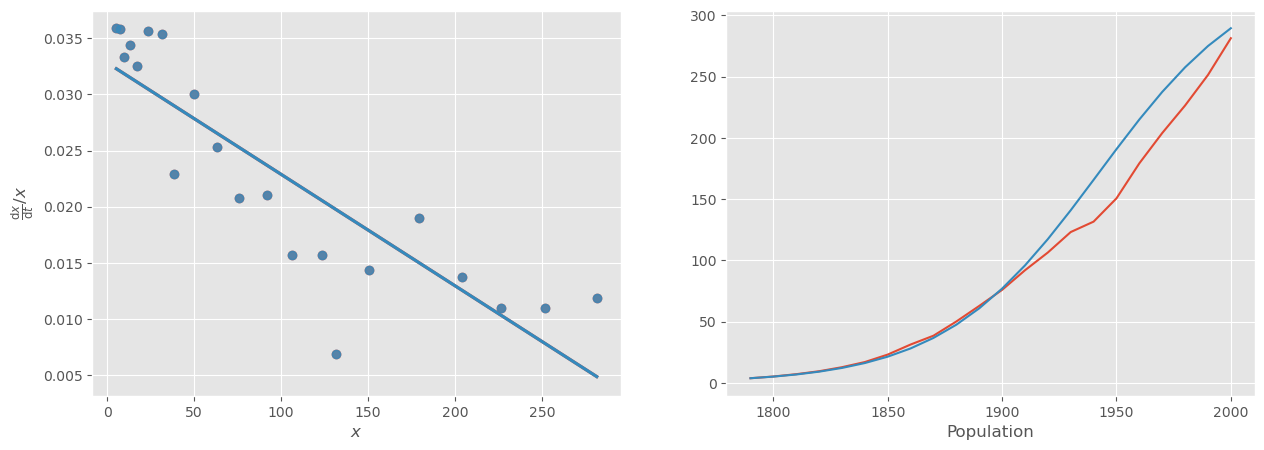

In [26]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]
y = []
for i in range(len(population)-1):
    y.append((population[i+1] - population[i])/10/population[i])
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.regplot(population[1:],y,ci = 0) 
plt.ylabel(r'$\frac{\mathrm{d}x}{\mathrm{d}t}/{x}$')
plt.xlabel(r'$x$')
lrModel = LinearRegression() 
lrModel.fit(np.array(population[7:-1]).reshape(-1,1),y[6:-1])
r = lrModel.intercept_
xm = r/(-lrModel.coef_)
plt.subplot(1,2,1)
sns.regplot(population[1:],y,ci = 0) 
plt.ylabel(r'$\frac{\mathrm{d}x}{\mathrm{d}t}/{x}$')
plt.xlabel(r'$x$')
plt.subplot(1,2,2)
x0 = population[0]
plt.plot(year,population,label = 'Real Data') # 绘图 
pop_predicted = [xm * (1 + (xm/x0 -1) * np.exp(- r * (time - 1790)))**(-1) for time in year] # 预测曲线
plt.plot(year,pop_predicted,label = 'Predicted') # 绘图
plt.xlabel('Year') # 加横坐标label 
plt.xlabel('Population') # 加横坐标label 
plt.show()